In [1]:
import os
import pandas as pd

# Define the path where the images and CSV files are located


# Define the paths for the CSV files
train_csv = os.path.join("..", 'data','train_mapping.csv')
val_csv = os.path.join("..", 'data', 'validation_mapping.csv')

# Change the working directory to the path where the images are located


# Function to read CSV and get image filenames
def get_image_filenames_from_csv(csv_path):
    # Read the CSV file
    df = pd.read_csv(csv_path)
    
    # Assuming the image IDs are in a column named 'asset_id'
    # Modify this line if your CSV has a different column name
    image_ids = df['asset_id'].tolist()
    
    # Append '.jpg' to each image ID
    image_filenames = [f"{image_id}.jpg" for image_id in image_ids]
    
    return image_filenames

# Get image filenames from both CSV files
train_images = get_image_filenames_from_csv(train_csv)
val_images = get_image_filenames_from_csv(val_csv)

In [2]:
import os
import numpy as np
import pandas as pd
import pickle
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import load_img
from keras.models import Model
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the paths for the CSV files
train_csv = os.path.join("..", 'data', 'train_mapping.csv')
val_csv = os.path.join("..", 'data', 'validation_mapping.csv')

# Function to read CSV and get image filenames
def get_image_filenames_from_csv(csv_path, limit=1000):
    df = pd.read_csv(csv_path)
    image_ids = df['asset_id'].tolist()[:limit]
    image_filenames = [f"{image_id}.jpg" for image_id in image_ids]
    return image_filenames

# Get image filenames from both CSV files
train_images = get_image_filenames_from_csv(train_csv)
val_images = get_image_filenames_from_csv(val_csv)


# Load VGG16 model and remove the last layer
model = VGG16(weights='imagenet', include_top=True)
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

# Function to extract features from an image using VGG16
def extract_features(file, model):
    file_path = os.path.join('..','data', 'processed', file)
    img = load_img(file_path, target_size=(224, 224))
    img = np.array(img)
    reshaped_img = img.reshape(1,224, 224, 3)
    imgx = preprocess_input(reshaped_img)
    features = model.predict(imgx)
    return features




# Extract features from all images and save to a dictionary
data = {}
for image in train_images:
    feat = extract_features(image, model)
    data[image] = feat
    

# Convert dictionary to lists of filenames and features
filenames = np.array(list(data.keys()))
feat = np.array(list(data.values()))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [3]:
feat = feat.reshape(-1,4096)

In [4]:
feat.shape

(1000, 4096)

In [5]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [6]:
x.shape

(1000, 100)

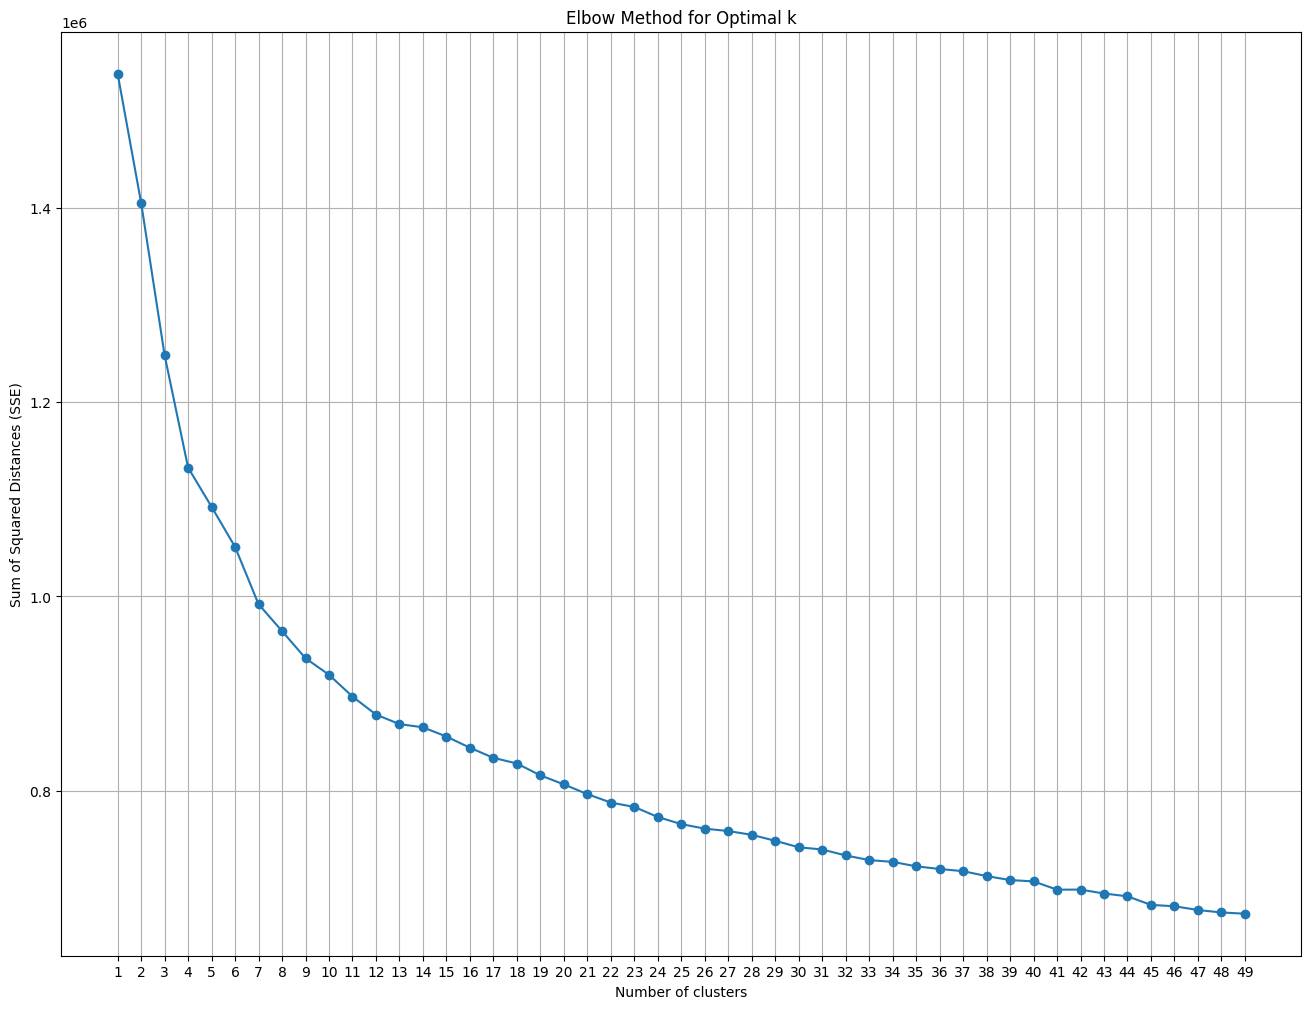

In [7]:
sse = []
list_k = list(range(1, 50))  # Range of cluster numbers to try

for k in list_k:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

# Plot SSE against the number of clusters
plt.figure(figsize=(16, 12))
plt.plot(list_k, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal k')
plt.xticks(list_k)
plt.grid(True)
plt.show()

In [8]:
kmeans = KMeans(n_clusters = 7 , random_state=1)
kmeans.fit(x)

KMeans(n_clusters=7, random_state=1)

Cluster 0:


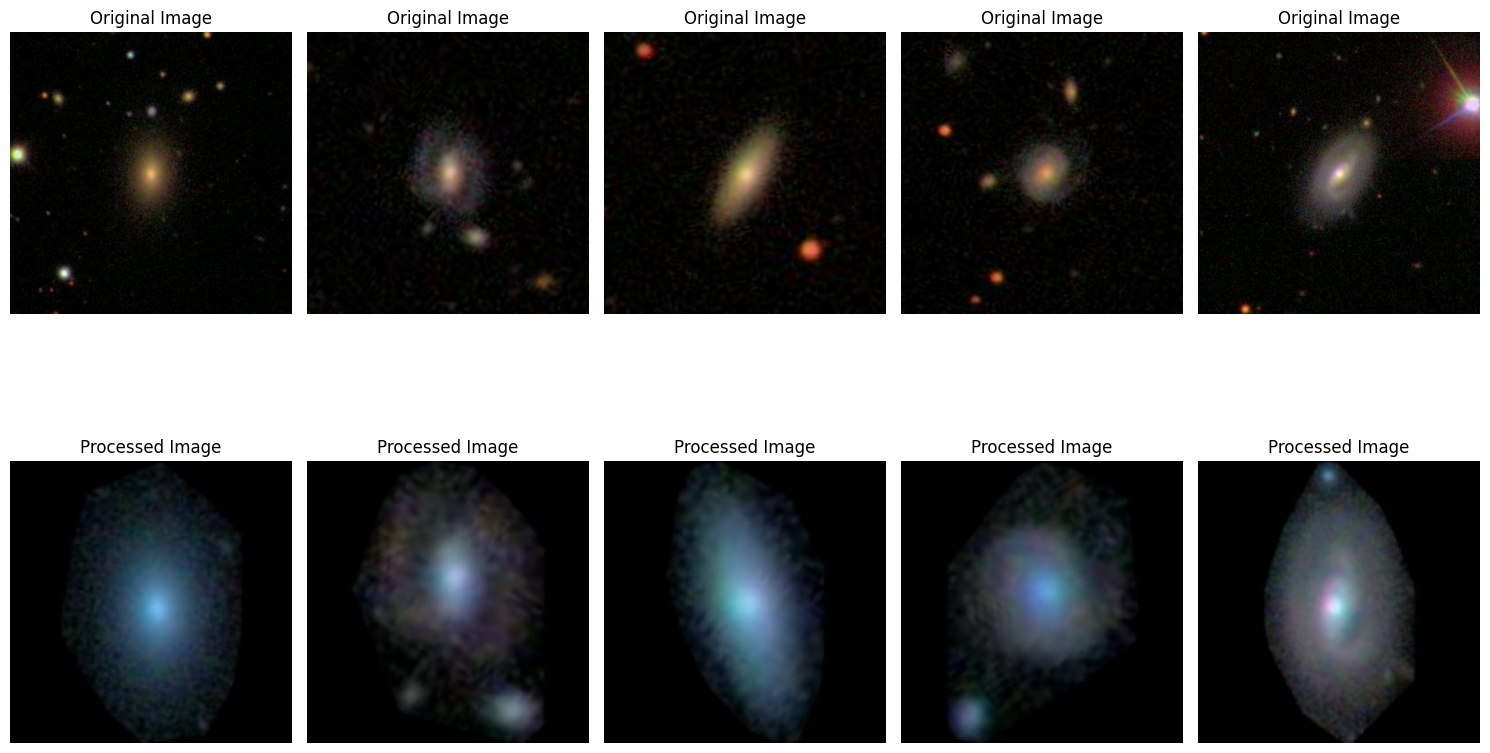

Cluster 1:


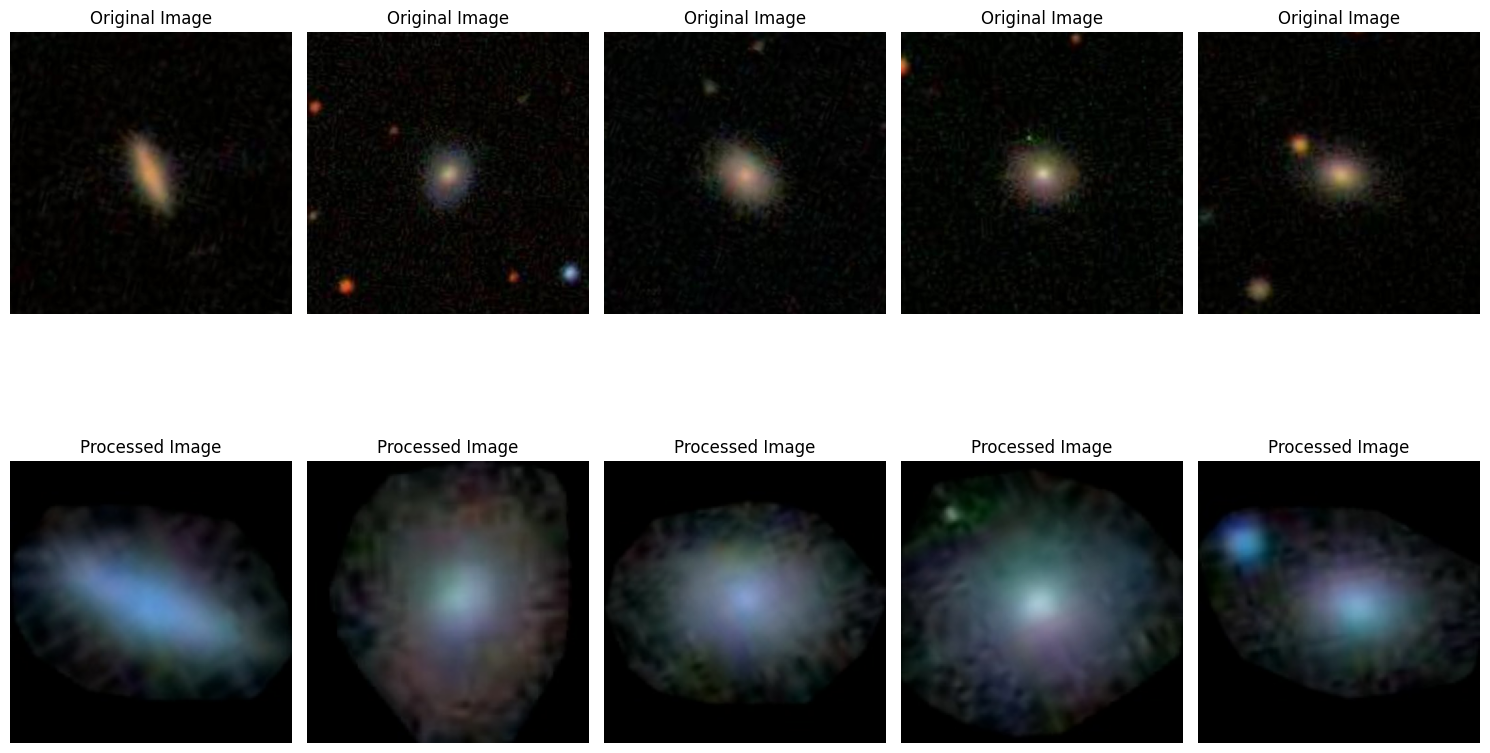

Cluster 2:


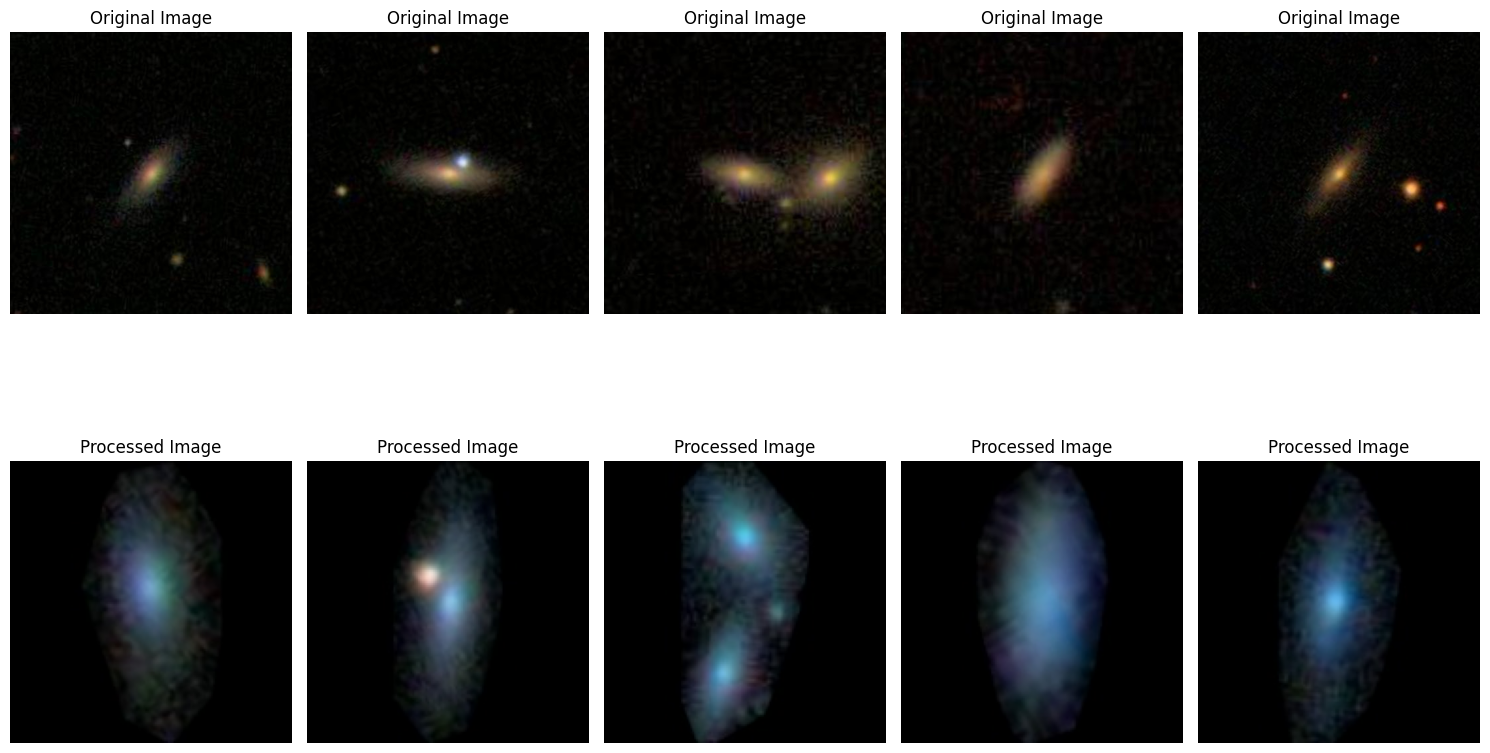

Cluster 3:


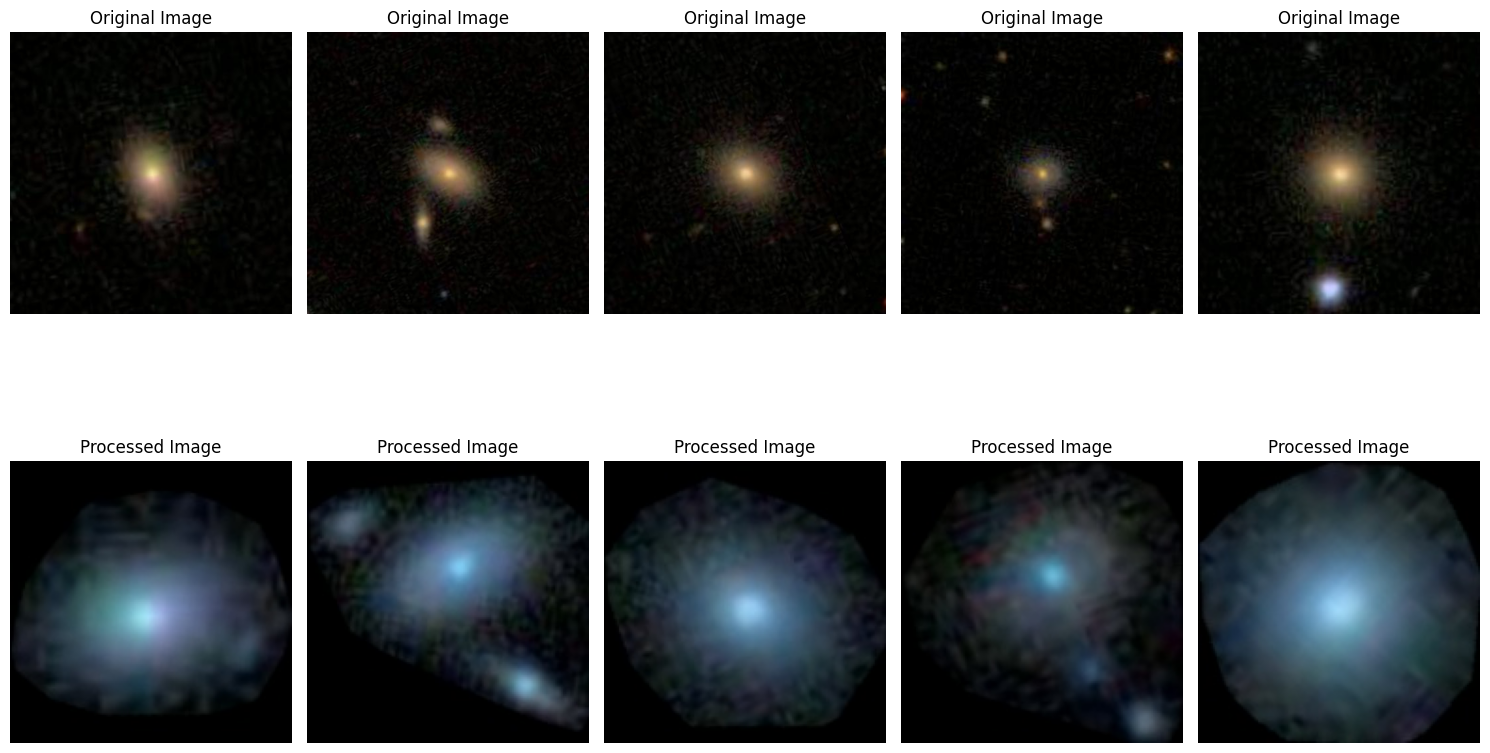

Cluster 4:


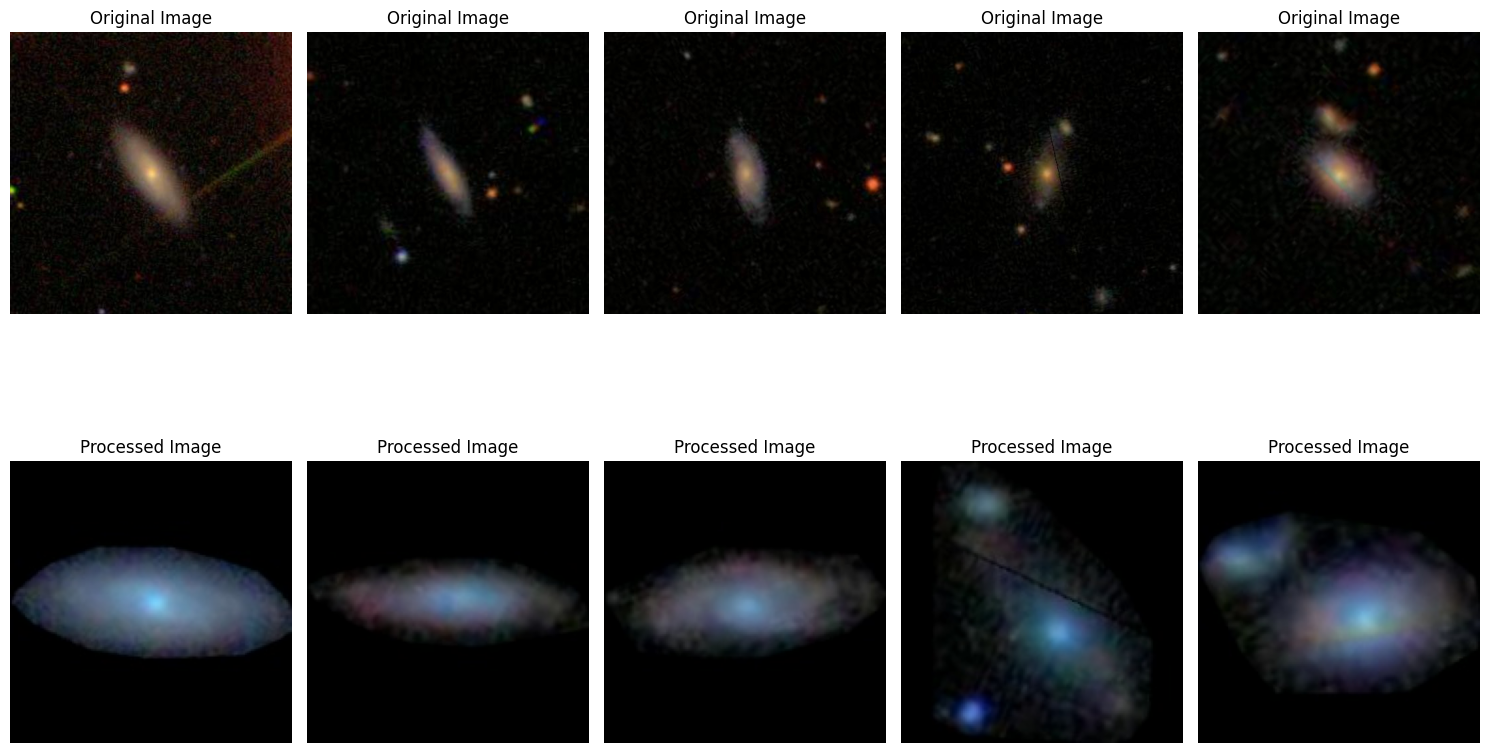

Cluster 5:


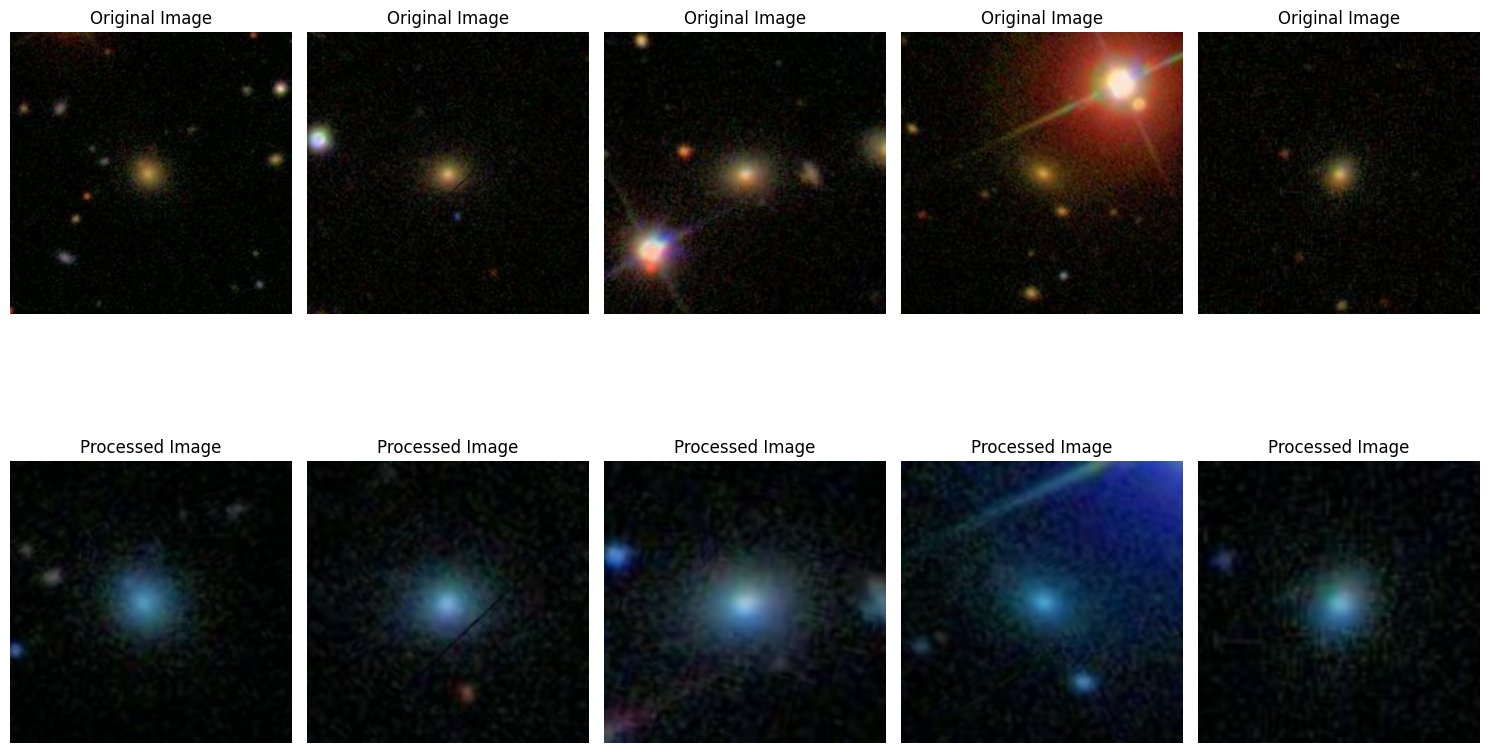

Cluster 6:


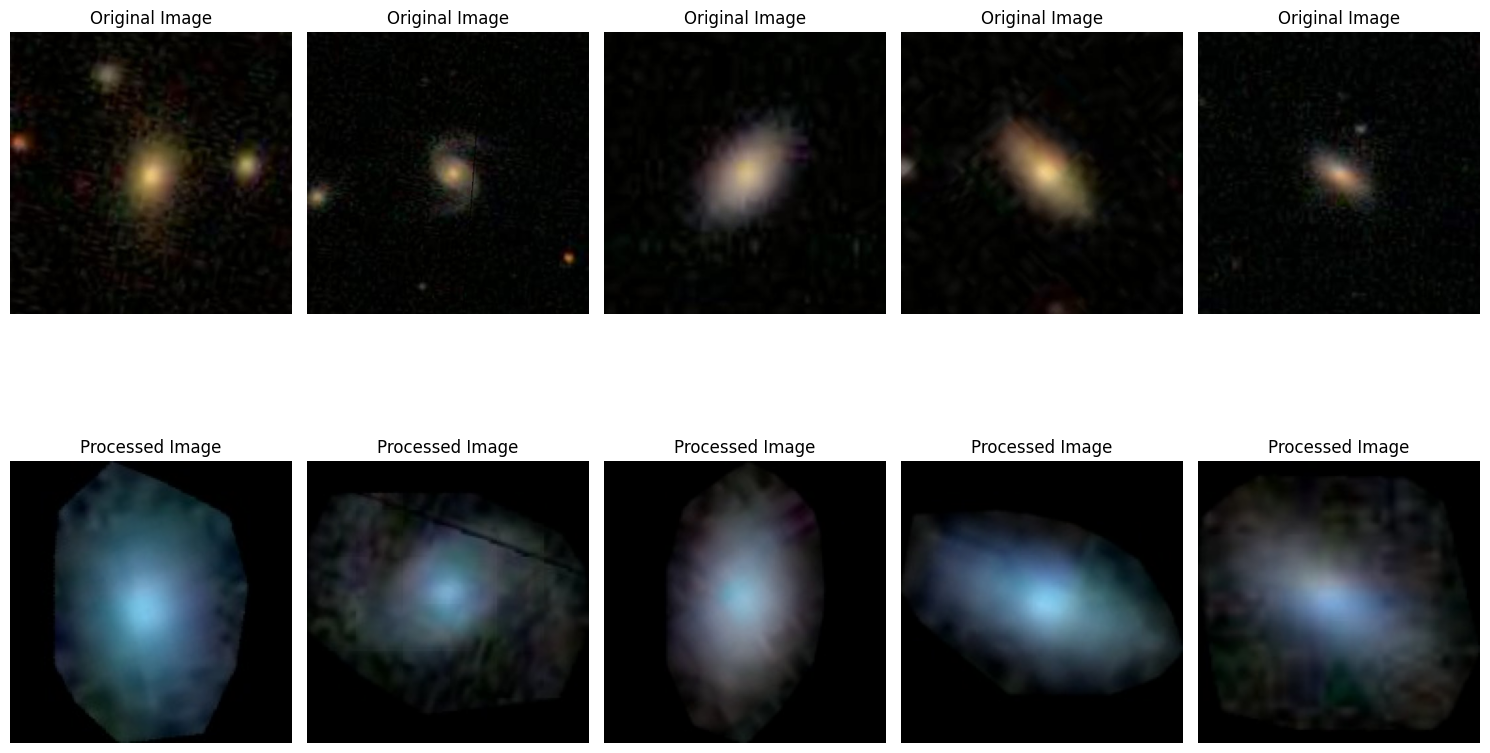

In [9]:
cluster_filenames = {}
for file, cluster in zip(filenames, kmeans.labels_):
    if cluster not in cluster_filenames:
        cluster_filenames[cluster] = []
    cluster_filenames[cluster].append(file)

# Function to display images in a cluster
def view_cluster(cluster, num_images=5):
    files = np.random.choice(cluster_filenames[cluster], size=min(num_images, len(cluster_filenames[cluster])), replace=False)
    plt.figure(figsize=(15, 10))
    for i, file in enumerate(files):
        original_file_path = os.path.join('..', 'data', 'galaxy_zoo', file)
        processed_file_path = os.path.join('..', 'data', 'processed', file)
        
        # Load original image
        original_img = load_img(original_file_path)
        
        # Load processed image
        processed_img = load_img(processed_file_path)
        
        # Plot original image
        plt.subplot(2, num_images, i + 1)
        plt.imshow(original_img)
        plt.title('Original Image')
        plt.axis('off')
        
        # Plot processed image
        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(processed_img)
        plt.title('Processed Image')
        plt.axis('off')
        
    plt.tight_layout()
    plt.show()



# Visualize a random subset of images from each cluster
num_clusters_to_display = min(len(cluster_filenames), 10)  
for i in range(num_clusters_to_display):
    print(f"Cluster {i}:")
    view_cluster(i)
